# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units: "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hayma'
City not found. Skipping...
Processing Record 2 of Set 1 | kabalo
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | yuzhno-kurilsk
Processing Record 9 of Set 1 | ghat
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | binkolo
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | verkhnevilyuysk
Processing Record 15 of Set 1 | antalaha
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | polyarnyy
Processing Record 18 of Set 1 | viedma
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


record_count = city_data_df.count()
print(record_count)

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kabalo,-6.0500,26.9167,68.41,97,100,1.12,CD,1707017226
1,hermanus,-34.4187,19.2345,72.81,87,36,5.17,ZA,1707017226
2,adamstown,-25.0660,-130.1015,78.04,73,100,4.97,PN,1707016993
3,grytviken,-54.2811,-36.5092,49.55,78,96,12.21,GS,1707017226
4,lorengau,-2.0226,147.2712,86.20,72,89,10.89,PG,1707017226


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kabalo,-6.0500,26.9167,68.41,97,100,1.12,CD,1707017226
1,hermanus,-34.4187,19.2345,72.81,87,36,5.17,ZA,1707017226
2,adamstown,-25.0660,-130.1015,78.04,73,100,4.97,PN,1707016993
3,grytviken,-54.2811,-36.5092,49.55,78,96,12.21,GS,1707017226
4,lorengau,-2.0226,147.2712,86.20,72,89,10.89,PG,1707017226


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

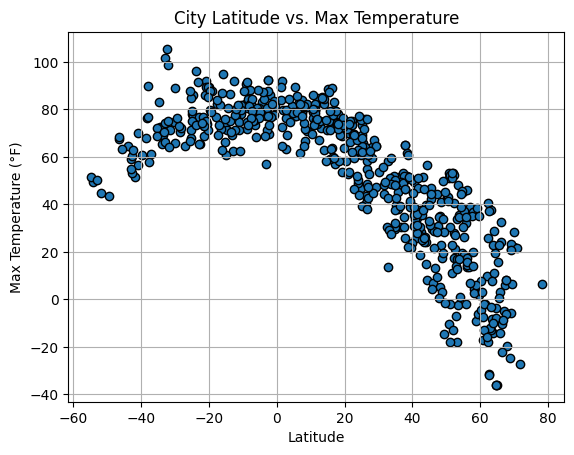

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")


plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")


plt.grid(True)

#Save figure
plt.savefig("../output_dataFig1.png")


plt.show()

#### Latitude Vs. Humidity

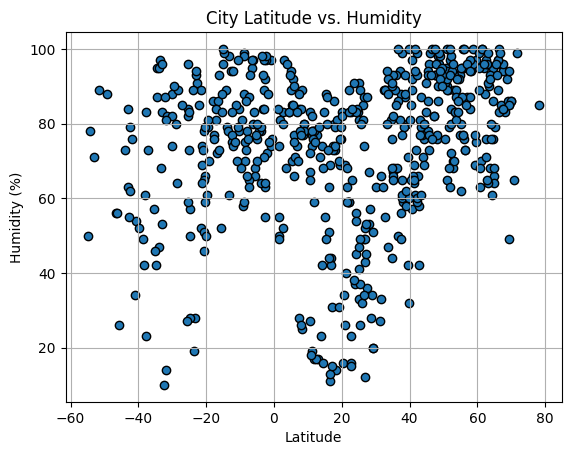

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")


plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

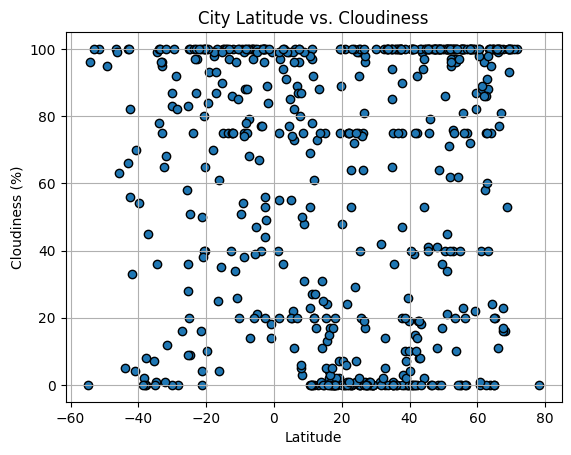

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")


plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")


plt.show()


#### Latitude vs. Wind Speed Plot

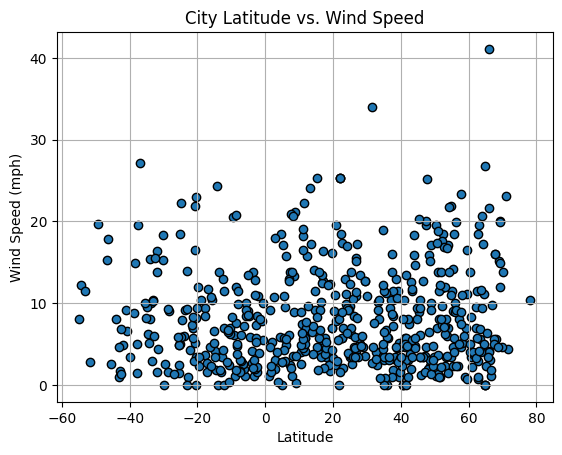

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")


plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")


plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate regression line
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black")

    # Plot regression line
    plt.plot(x_values, regression_line, color="red", label="Linear Regression")

    # Annotate the linear regression equation on the plot
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Set chart title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

  
    plt.legend()

    # Save the figure
    plt.savefig(f"output_data/{file_name}.png")

   
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,yuzhno-kurilsk,44.0306,145.8556,24.37,71,94,18.32,RU,1707017227
7,ghat,24.9647,10.1728,46.76,33,0,3.58,LY,1707017052
8,anadyr,64.7500,177.4833,-3.50,76,100,26.84,RU,1707016993
10,binkolo,8.9533,-11.9779,70.92,80,48,0.29,SL,1707017228
11,albany,42.6001,-73.9662,28.36,66,19,3.80,US,1707017228


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kabalo,-6.0500,26.9167,68.41,97,100,1.12,CD,1707017226
1,hermanus,-34.4187,19.2345,72.81,87,36,5.17,ZA,1707017226
2,adamstown,-25.0660,-130.1015,78.04,73,100,4.97,PN,1707016993
3,grytviken,-54.2811,-36.5092,49.55,78,96,12.21,GS,1707017226
4,lorengau,-2.0226,147.2712,86.20,72,89,10.89,PG,1707017226


###  Temperature vs. Latitude Linear Regression Plot

R-value: -0.87


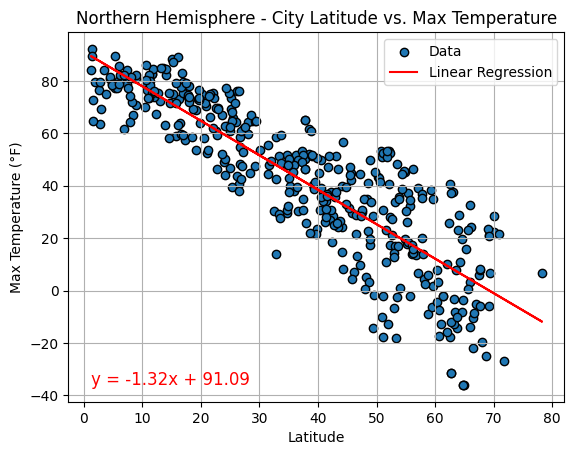

In [15]:
# Northern Hemisphere DataFrame
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression for Temperature vs. Latitude in the Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Calculate regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Max Temp"])), fontsize=12, color="red")

# Set chart title and labels
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Add legend
plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Northern_Hemi_Temp_vs_Lat_Regression.png")


plt.show()

R-value: 0.5


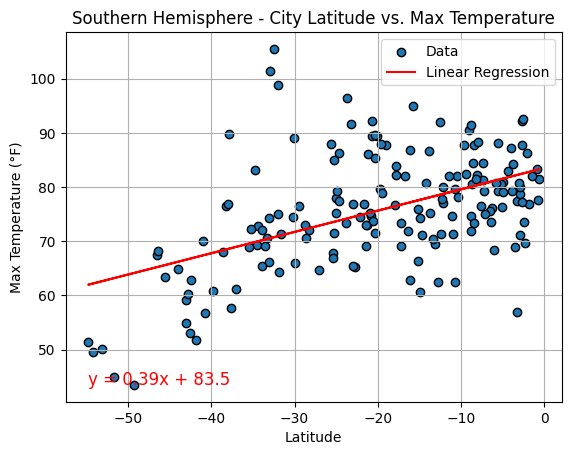

In [16]:
# Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression for Temperature vs. Latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Max Temp"])), fontsize=12, color="red")


plt.title("Southern Hemisphere - City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Add legend
plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Southern_Hemi_Temp_vs_Lat_Regression.png")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.42


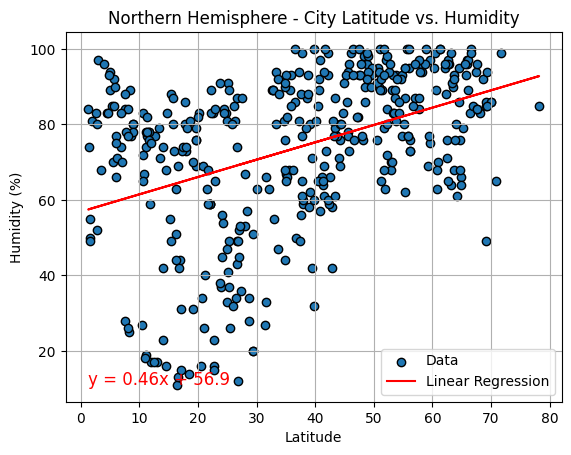

In [17]:
# Northern Hemisphere DataFrame
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression for Humidity vs. Latitude in the Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Humidity"])), fontsize=12, color="red")


plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add legend
plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Northern_Hemi_Humidity_vs_Lat_Regression.png")


plt.show()

R-value: 0.34


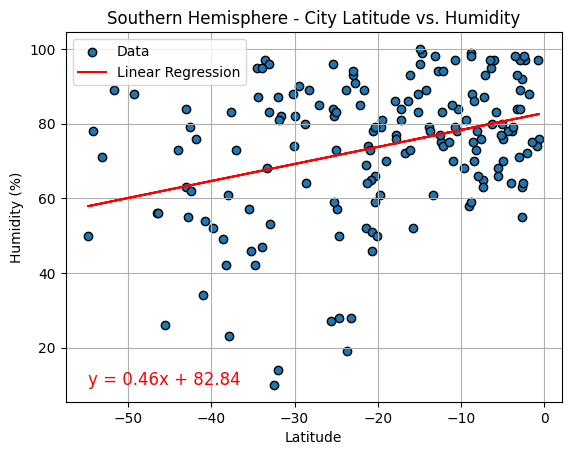

In [18]:
# Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression for Humidity vs. Latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Humidity"])), fontsize=12, color="red")


plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Southern_Hemi_Humidity_vs_Lat_Regression.png")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 0.26


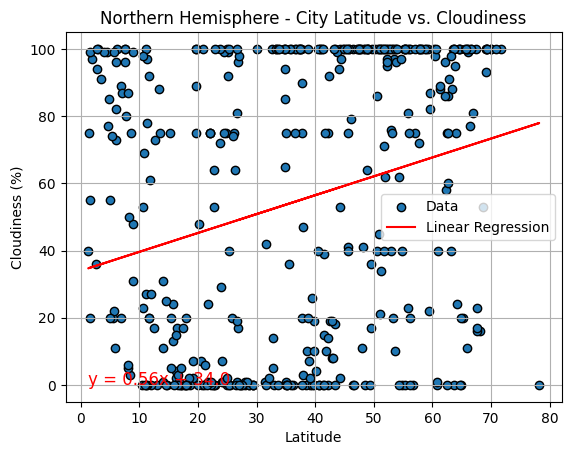

In [19]:
# Northern Hemisphere DataFrame
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Cloudiness"])), fontsize=12, color="red")


plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Northern_Hemi_Cloudiness_vs_Lat_Regression.png")


plt.show()

R-value: 0.19


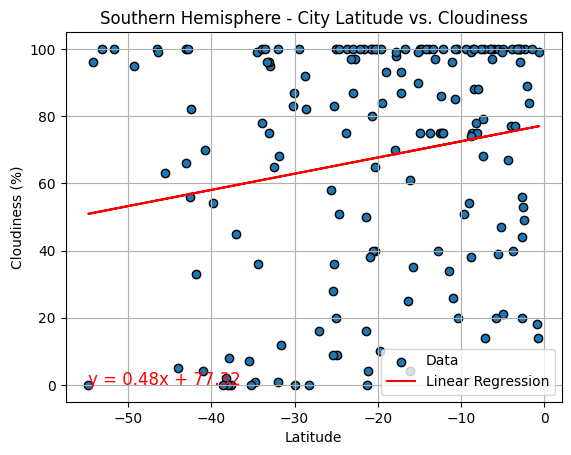

In [20]:
# Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Cloudiness"])), fontsize=12, color="red")


plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Southern_Hemi_Cloudiness_vs_Lat_Regression.png")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-value: 0.04


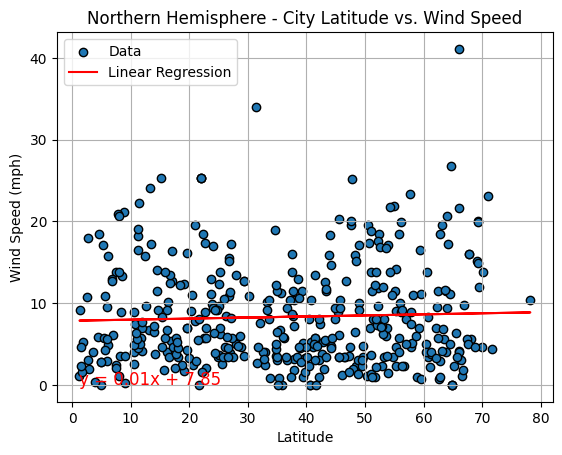

In [21]:
# Northern Hemisphere DataFrame
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Wind Speed"])), fontsize=12, color="red")


plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Northern_Hemi_WindSpeed_vs_Lat_Regression.png")


plt.show()

R-value: -0.17


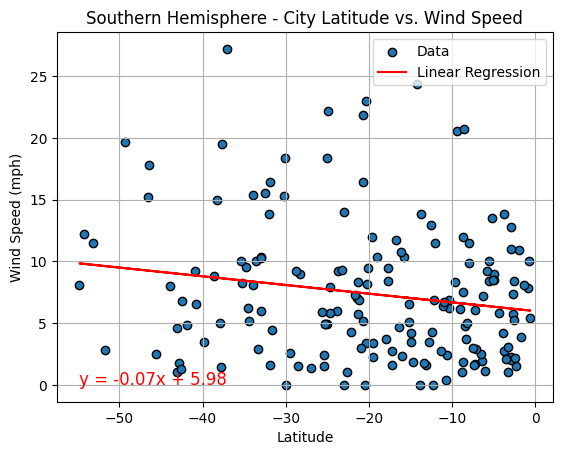

In [22]:
# Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression for Wind Speed vs. Latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Print the linear regression equation and r-value
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"R-value: {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black", label="Data")

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regression_line, color="red", label="Linear Regression")

# Annotate the linear regression equation on the plot
equation_annotation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation_annotation, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Wind Speed"])), fontsize=12, color="red")


plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.legend()


plt.grid(True)

# Save the figure
plt.savefig("../output_data/Southern_Hemi_WindSpeed_vs_Lat_Regression.png")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
#Temperature vs. Latitude:
    #In both hemispheres, there is a clear linear relationship between latitude and temperature. As latitude increases (moving away from the equator), the temperature tends to decrease in the Northern Hemisphere and increase in the Southern Hemisphere. The linear regression analysis confirms this relationship, with high r-values indicating a strong correlation.

#Humidity vs. Latitude:
    #The linear regression analysis for humidity vs. latitude shows a less pronounced relationship. In both hemispheres, there is a slight increase in humidity as we move away from the equator. However, the correlation is weaker compared to temperature, as indicated by lower r-values.

#Cloudiness vs. Latitude:
    #The scatter plots for cloudiness vs. latitude in both hemispheres display a scattered distribution, and the linear regression analysis suggests a very weak correlation. Cloudiness appears to have less dependence on latitude, and other factors may contribute more significantly to cloud cover.

#Wind Speed vs. Latitude:
    #The linear regression analysis for wind speed vs. latitude indicates a weak correlation. While there is a slight increase in wind speed as we move away from the equator in the Southern Hemisphere, the trend is less clear in the Northern Hemisphere. Other local and regional factors likely play a more significant role in determining wind speed.

#Overall Observation:
    #It's important to note that while linear regression provides insights into trends, the observed relationships may be influenced by various factors, including local geography, climate patterns, and seasonal variations. Additionally, linear regression assumes a linear relationship, and other more complex relationships may exist.

#Consideration:
    #Further analysis, including consideration of additional variables and exploration of non-linear relationships, could provide a more comprehensive understanding of the factors influencing weather patterns across different latitudes.